### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
os.environ['MKL_THREADING_LAYER']='GNU'
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/giles/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


In [2]:
def saveTest(cuts, name):
    data = pandas.DataFrame()
    
    for i in xrange(3):
        tmp = pandas.DataFrame()
        testData = h5py.File(dirLoc + 'testing_' + str(i) + '.hdf5', "r+")
        
        tmp['EventId'] = getFeature('EventId', testData)
        tmp['pred_class'] = getFeature('pred', testData)
    
        tmp['Class'] = 'b'
        tmp.loc[tmp.pred_class >= cuts[i], 'Class'] = 's'
        
        data = data.append(tmp, ignore_index = True)

    data.sort_values(by=['pred_class'], inplace=True)
    data['RankOrder']=range(1, len(data)+1)
    data.sort_values(by=['EventId'], inplace=True)

    print dirLoc + name + '_test.csv'
    data.to_csv(dirLoc + name + '_test.csv', columns=['EventId', 'RankOrder', 'Class'], index=False)

In [52]:
def plotSplitDist(cut, nJets):
    tmp = pandas.DataFrame()
    testData = h5py.File(dirLoc + 'testing_' + str(nJets) + '.hdf5', "r+")

    tmp['EventId'] = getFeature('EventId', testData)
    tmp['pred_class'] = getFeature('pred', testData)

    tmp['Class'] = 'b'
    tmp.loc[tmp.pred_class >= cut, 'Class'] = 's'
    
    getClassPredPlot([tmp[tmp.Class == 's'], tmp[tmp.Class == 'b']])

In [38]:
def amsVal(cuts):
    data = pandas.DataFrame()
    
    for i in xrange(3):
        tmp = pandas.DataFrame()
        testData = h5py.File(dirLoc + 'val_' + str(i) + '.hdf5', "r+")
        
        tmp['pred_class'] = getFeature('pred', testData)
        tmp['gen_target'] = getFeature('targets', testData)
        tmp['gen_weight'] = getFeature('weights', testData)
    
        tmp['sig_reg'] = 0
        tmp.loc[tmp.pred_class >= cuts[i], 'sig_reg'] = 1
        
        data = data.append(tmp, ignore_index = True)

    return data

In [39]:
valData = amsVal([0.9729418158531189,
          0.9622855186462402,
          0.9629805684089661])

In [40]:
len(valData)

50001

In [44]:
amsScan(valData)

[0.9729418158531189, 1.5704459517092197]


[0.5691797301953652,
 0.7941680840197369,
 0.632354275224087,
 0.9034174130216982,
 1.1485340245916158,
 1.5387178231335288,
 0.7158428261630414,
 0.6960640755677308,
 1.486208204391839,
 0.4868506795085847,
 0.5118665361607476,
 0.7177478380397634,
 1.4826695300796116,
 0.4995007472568629,
 0.5015941510303383,
 1.3341773562907397,
 0.8028329732964857,
 0.818901086184717,
 0.9549397472650426,
 1.424380050107293,
 0.9354670727422679,
 0.8908826914960937,
 0.4915079102048622,
 0.9630698394412551,
 1.5489572081962544,
 0.5088610109571706,
 0.6673588231343001,
 0.7179220628634195,
 0.7105346428948824,
 0.5172091905156053,
 0.7486457663615981,
 1.269489697066557,
 1.5152581050144631,
 0.7588559049886031,
 1.298213475496162,
 0.5075577324467118,
 0.8605013042078814,
 0.6217170250886783,
 0.7461797270046229,
 1.0070809096575415,
 0.6072924522672728,
 0.7417436268684354,
 0.82259384109235,
 0.8888097764428052,
 0.510089913250611,
 0.48139407652201566,
 0.4835836978978643,
 0.6452511467731721,


In [49]:
AMS(np.sum(valData[(valData.gen_target == 1) & (valData.sig_reg == 1)]['gen_weight']), np.sum(valData[(valData.gen_target == 0) & (valData.sig_reg == 1)]['gen_weight']))

1.7313488591647588

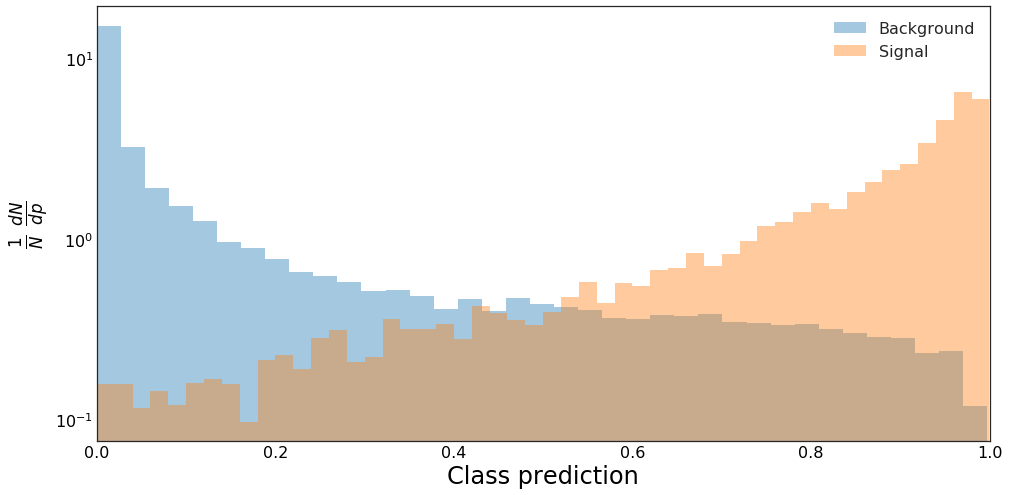

In [43]:
getClassPredPlot([valData[(valData.gen_target == 0)], valData[(valData.gen_target == 1)]], weightName='gen_weight')

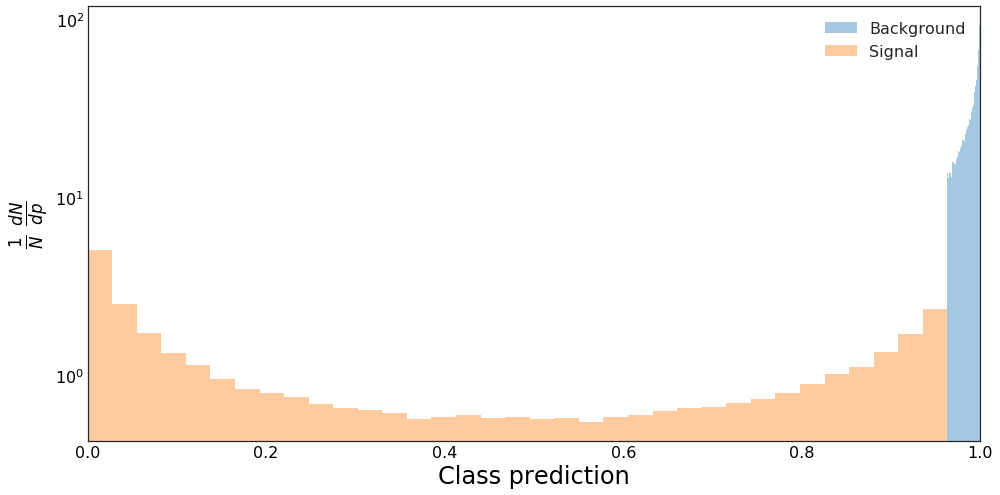

In [53]:
plotSplitDist(0.9629805684089661, 2)

In [48]:
saveTest([0.9729418158531189,
          0.9622855186462402,
          0.9629805684089661],
        'Day_3_Basic_Features_256_1e-3_swish_mult2_50E_normedweighted_rot_cart_split')

../Data/Day_3_Basic_Features_256_1e-3_swish_mult2_50E_normedweighted_rot_cart_split_test.csv


In [47]:
!kaggle competitions submit -c higgs-boson -f ../Data/Day_3_Basic_Features_256_1e-3_swish_mult2_50E_normedweighted_rot_cart_split_test.csv -m"Day2"

Successfully submitted to Higgs Boson Machine Learning Challenge